__Importing main libraries__

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Analysing data

__Loading data and displaying first 5 rows__

In [ ]:
data = pd.read_csv('Telco_customer_churn.csv')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


__Getting dataset's shape and information about it__

In [ ]:
print('Shape:', data.shape)
print(data.info())

Shape: (7043, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Intern

__Analyzing numerical data__

In [ ]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


__Checking correlation of numeric columns__

In [ ]:
# Count column is useless in this dataset, so better to drop it
data.drop('Count', axis=1, inplace=True)
data.corr(numeric_only=True)

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
Zip Code,1.000000,0.895743,-0.784271,0.001041,-0.004596,0.003346,-0.002769,-0.003562
Latitude,0.895743,1.000000,-0.876779,-0.001631,-0.019899,-0.003384,-0.007684,0.000886
Longitude,-0.784271,-0.876779,1.000000,-0.001678,0.024098,0.004594,0.004260,0.000485
Tenure Months,0.001041,-0.001631,-0.001678,1.000000,0.247900,-0.352229,-0.224987,0.396406
Monthly Charges,-0.004596,-0.019899,0.024098,0.247900,1.000000,0.193356,0.133754,0.098693
Churn Value,0.003346,-0.003384,0.004594,-0.352229,0.193356,1.000000,0.664897,-0.127463
Churn Score,-0.002769,-0.007684,0.004260,-0.224987,0.133754,0.664897,1.000000,-0.079782
CLTV,-0.003562,0.000886,0.000485,0.396406,0.098693,-0.127463,-0.079782,1.000000


__Compare the number of Churned customers and not Churned__

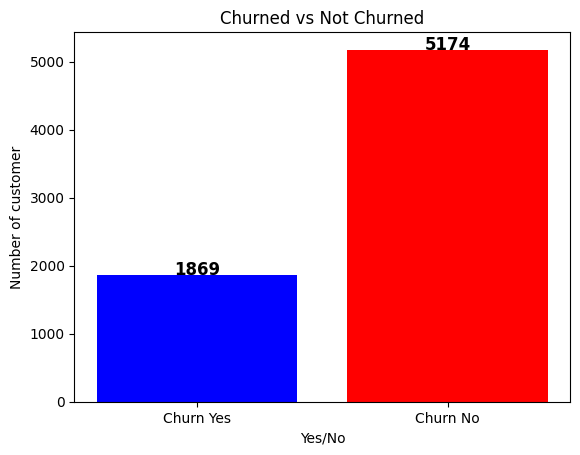

In [ ]:
count_yes = data[data['Churn Label'] == 'Yes'].count().values[0]
count_no = data['Churn Label'].count() - count_yes
counts = (count_yes, count_no)
labels = ('Churn Yes', 'Churn No')
colors = ['blue', 'red']
fig, ax = plt.subplots()

ax.bar(labels, counts, color=colors)
for i in range(len(labels)):
  ax.text(
        labels[i], counts[i],
        counts[i], ha='center',
        fontweight='bold', fontsize='large'
        )
ax.set(
      title='Churned vs Not Churned',
      ylabel='Number of customer',
      xlabel='Yes/No'
      )
plt.show()

__Getting columns with "object" dtype and "numerical" dtype seperatly__

In [ ]:
obj_columns = pd.DataFrame()
num_columns = pd.DataFrame()
for col in data.columns:
  if data[col].dtype == 'object':
    obj_columns[col] = data[col]
  else:
     num_columns[col] = data[col]
display(obj_columns.head())
display(num_columns.head())

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label,Churn Reason
0,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,Competitor made better offer
1,9237-HQITU,United States,California,Los Angeles,"34.059281, -118.30742",Female,No,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,Moved
2,9305-CDSKC,United States,California,Los Angeles,"34.048013, -118.293953",Female,No,No,Yes,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes,Moved
3,7892-POOKP,United States,California,Los Angeles,"34.062125, -118.315709",Female,No,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes,Moved
4,0280-XJGEX,United States,California,Los Angeles,"34.039224, -118.266293",Male,No,No,Yes,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3,Yes,Competitor had better devices


,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
0,90003,33.964131,-118.272783,2,53.85,1,86,3239
1,90005,34.059281,-118.307420,2,70.70,1,67,2701
2,90006,34.048013,-118.293953,8,99.65,1,86,5372
3,90010,34.062125,-118.315709,28,104.80,1,84,5003
4,90015,34.039224,-118.266293,49,103.70,1,89,5340


In [ ]:
obj_columns.columns

Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Total Charges', 'Churn Label', 'Churn Reason'],
      dtype='object')

__Analyzing the data and extacting categorical data which has to be encoded__

In [ ]:
categorical_data = obj_columns[
    [
        'Gender', 'Senior Citizen', 'Partner',
        'Dependents', 'Phone Service', 'Multiple Lines',
        'Internet Service', 'Online Security', 'Online Backup',
        'Device Protection', 'Tech Support', 'Streaming TV',
        'Streaming Movies', 'Contract', 'Paperless Billing',
        'Payment Method',
    ]
]
categorical_data.head()

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method
0,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
1,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)


__Getting unique values for each column__

In [ ]:
unique_vals = {}
for col in categorical_data.columns:
  unique_vals[col] = list(categorical_data[col].unique())
unique_vals

{'Gender': ['Male', 'Female'],
 'Senior Citizen': ['No', 'Yes'],
 'Partner': ['No', 'Yes'],
 'Dependents': ['No', 'Yes'],
 'Phone Service': ['Yes', 'No'],
 'Multiple Lines': ['No', 'Yes', 'No phone service'],
 'Internet Service': ['DSL', 'Fiber optic', 'No'],
 'Online Security': ['Yes', 'No', 'No internet service'],
 'Online Backup': ['Yes', 'No', 'No internet service'],
 'Device Protection': ['No', 'Yes', 'No internet service'],
 'Tech Support': ['No', 'Yes', 'No internet service'],
 'Streaming TV': ['No', 'Yes', 'No internet service'],
 'Streaming Movies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'Two year', 'One year'],
 'Paperless Billing': ['Yes', 'No'],
 'Payment Method': ['Mailed check',
  'Electronic check',
  'Bank transfer (automatic)',
  'Credit card (automatic)']}

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def custom_combiner(feature, category):
    return str(feature) + "_" + str(category)

custom_fnames_enc = OneHotEncoder(sparse_output=False, feature_name_combiner=custom_combiner).fit(categorical_data)
col_names = custom_fnames_enc.get_feature_names_out()
categorical_vals = custom_fnames_enc.transform(categorical_data)
categorical_vals

array([[0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

__Creating a dataset with encoded data__

In [ ]:
transformed_data = pd.DataFrame(columns=col_names)
for idx, row in enumerate(categorical_vals):
  transformed_data.loc[-1] = row
  transformed_data.index += 1
transformed_data

,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
7042,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7041,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7040,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7038,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


__Sorting it, so indexes are in the right order__

In [ ]:
transformed_data = transformed_data.sort_index()
transformed_data.head()

,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


__Concating 2 DataFrames (numeric data and categorical data) into 1 DataFrame__

In [ ]:
only_num_data = pd.concat([num_columns, transformed_data], axis=1)
only_num_data.head()

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,Gender_Female,Gender_Male,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,90003,33.964131,-118.272783,2,53.85,1,86,3239,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,90005,34.059281,-118.307420,2,70.70,1,67,2701,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,90006,34.048013,-118.293953,8,99.65,1,86,5372,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,90010,34.062125,-118.315709,28,104.80,1,84,5003,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,90015,34.039224,-118.266293,49,103.70,1,89,5340,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


__Heatmap of correlation__

In [ ]:
corr = only_num_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
Zip Code,1.000000,0.895743,-0.784271,0.001041,-0.004596,0.003346,-0.002769,-0.003562,-0.014131,0.014131,-0.004091,0.004091,-0.000266,0.000266,0.017374,-0.017374,0.013320,-0.013320,-0.002362,0.013320,-0.005586,0.011272,0.002435,-0.015929,0.018709,-0.015929,-0.006173,0.001409,-0.015929,0.012335,0.022038,-0.015929,-0.009211,0.025072,-0.015929,-0.013159,0.013806,-0.015929,-0.000407,0.010351,-0.015929,0.003082,0.005959,0.012702,-0.019019,-0.011005,0.011005,-0.026154,-0.016402,0.018111,0.021466
Latitude,0.895743,1.000000,-0.876779,-0.001631,-0.019899,-0.003384,-0.007684,0.000886,-0.010718,0.010718,-0.007898,0.007898,0.004317,-0.004317,0.029293,-0.029293,0.014002,-0.014002,0.004407,0.014002,-0.012843,0.008897,0.011211,-0.023763,0.026145,-0.023763,-0.007258,0.014930,-0.023763,0.005011,0.032845,-0.023763,-0.013709,0.038973,-0.023763,-0.021361,0.019315,-0.023763,0.000682,0.016757,-0.023763,0.003277,0.019629,0.007953,-0.030410,-0.016149,0.016149,-0.024342,-0.035637,0.039415,0.014577
Longitude,-0.784271,-0.876779,1.000000,-0.001678,0.024098,0.004594,0.004260,0.000485,0.012634,-0.012634,-0.005103,0.005103,-0.006978,0.006978,-0.029019,0.029019,-0.009019,0.009019,-0.014004,-0.009019,0.019569,-0.015962,0.005059,0.012307,-0.015727,0.012307,0.006177,-0.000099,0.012307,-0.010564,-0.023389,0.012307,0.013765,-0.024518,0.012307,0.015836,-0.009819,0.012307,-0.000539,-0.010272,0.012307,-0.000098,-0.007518,-0.014210,0.022268,0.000103,-0.000103,0.017832,0.029756,-0.025282,-0.018292
Tenure Months,0.001041,-0.001631,-0.001678,1.000000,0.247900,-0.352229,-0.224987,0.396406,0.000479,-0.000479,-0.032488,0.032488,0.020961,-0.020961,0.062646,-0.062646,-0.004519,0.004519,-0.006887,-0.004519,0.009674,-0.007213,0.039034,-0.038711,0.047188,-0.038711,-0.016907,0.035456,-0.038711,-0.003461,0.029848,-0.038711,0.002387,0.054642,-0.038711,-0.025053,0.018242,-0.038711,0.014421,0.024139,-0.038711,0.008508,0.061211,-0.029096,-0.043551,-0.027000,0.027000,-0.017986,-0.008567,0.044883,-0.024349
Monthly Charges,-0.004596,-0.019899,0.024098,0.247900,1.000000,0.193356,0.133754,0.098693,-0.006006,0.006006,0.016470,-0.016470,-0.023477,0.023477,-0.049764,0.049764,0.035066,-0.035066,-0.015756,0.035066,-0.005057,0.013707,-0.026326,0.015915,-0.021811,0.015915,0.009617,-0.018200,0.015915,0.005205,-0.018047,0.015915,0.005054,-0.011803,0.015915,-0.001444,-0.014068,0.015915,0.000683,-0.007895,0.015915,-0.005533,-0.047893,0.021415,0.035361,0.005280,-0.005280,0.011966,0.001008,-0.031731,0.022899
Churn Value,0.003346,-0.003384,0.004594,-0.352229,0.193356,1.000000,0.664897,-0.127463,0.004110,-0.004110,0.046286,-0.046286,-0.063201,0.063201,-0.168802,0.168802,0.023942,-0.023942,0.011840,0.023942,-0.026316,0.046405,-0.106634,0.074970,-0.115939,0.074970,0.059890,-0.099456,0.074970,0.038844,-0.081197,0.074970,0.019818,-0.118113,0.074970,0.062056,-0.045108,0.074970,-0.018085,-0.040156,0.074970,-0.023092,-0.154046,0.070459,0.112233,0.062727,-0.062727,0.044514,0.0

__Putting correlation of the featires into DataFrame with structure: feature -> feature and their correlation__

In [ ]:
filtered_corr = pd.DataFrame(columns=['row', 'column', 'corr'])
for idx in corr.index:
  corr_row = corr.loc[idx]
  for col_name, corr_val in zip(corr_row.index, corr_row.values):
    new_sample = pd.DataFrame(index=[0],
                              data={'row': idx, 'column': col_name, 'corr': corr_val})
    filtered_corr = pd.concat([filtered_corr, new_sample])
  # corr_row_filtered = corr_row.where(corr_row > 0.4).dropna()
  # corr_row_filtered_not_1 = corr_row_filtered.where(corr_row_filtered != 1).dropna()
  # print(corr_row_filtered_not_1)
filtered_corr.head(10)

,row,column,corr
0,Zip Code,Zip Code,1.000000
0,Zip Code,Latitude,0.895743
0,Zip Code,Longitude,-0.784271
0,Zip Code,Tenure Months,0.001041
0,Zip Code,Monthly Charges,-0.004596
0,Zip Code,Churn Value,0.003346
0,Zip Code,Churn Score,-0.002769
0,Zip Code,CLTV,-0.003562
0,Zip Code,Gender_Female,-0.014131
0,Zip Code,Gender_Male,0.014131


__Filter it, so we left with different correlations more than 0.4 and less than -0.4__

In [ ]:
filtered_corr_not_1 = filtered_corr[(filtered_corr['corr'] != 1) & (filtered_corr['corr'] != -1)]
filtered_corr_final = filtered_corr_not_1[(filtered_corr_not_1['corr'] > 0.4) | (filtered_corr_not_1['corr'] < -0.4)]
filtered_corr_final

,row,column,corr
0,Zip Code,Latitude,0.895743
0,Zip Code,Longitude,-0.784271
0,Latitude,Zip Code,0.895743
0,Latitude,Longitude,-0.876779
0,Longitude,Zip Code,-0.784271
...,...,...,...
0,Contract_Month-to-month,Tech Support_No,0.439110
0,Contract_Month-to-month,Contract_One year,-0.568744
0,Contract_Month-to-month,Contract_Two year,-0.622633
0,Contract_One year,Contract_Month-to-month,-0.568744


__Getting pairs of features to plot them and see any relations__

In [ ]:
columns = num_columns.columns
columns_to_plot = np.setdiff1d(columns, ['Count', 'Churn Value', 'Churn Score'])
idxs = range(len(columns_to_plot))
result = []
for i in idxs:
  for j in idxs[i:]:
    if columns_to_plot[i] == columns_to_plot[j]:
      continue
    result.append([columns_to_plot[i], columns_to_plot[j]])
result

[['CLTV', 'Latitude'],
 ['CLTV', 'Longitude'],
 ['CLTV', 'Monthly Charges'],
 ['CLTV', 'Tenure Months'],
 ['CLTV', 'Zip Code'],
 ['Latitude', 'Longitude'],
 ['Latitude', 'Monthly Charges'],
 ['Latitude', 'Tenure Months'],
 ['Latitude', 'Zip Code'],
 ['Longitude', 'Monthly Charges'],
 ['Longitude', 'Tenure Months'],
 ['Longitude', 'Zip Code'],
 ['Monthly Charges', 'Tenure Months'],
 ['Monthly Charges', 'Zip Code'],
 ['Tenure Months', 'Zip Code']]

__Plotting the pairs with random sample of data with size of 400; Color red represents Yes, Blue represents No__

In [ ]:
num_columns.columns

Index(['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Churn Value', 'Churn Score', 'CLTV'],
      dtype='object')

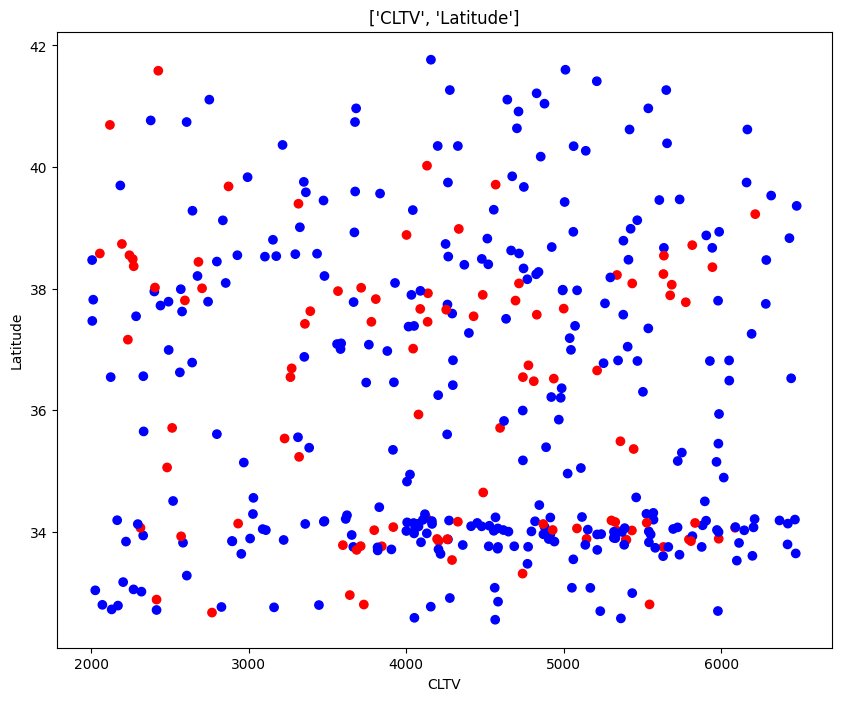

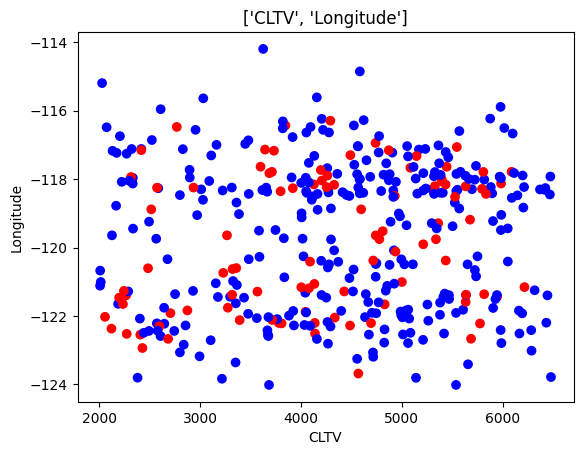

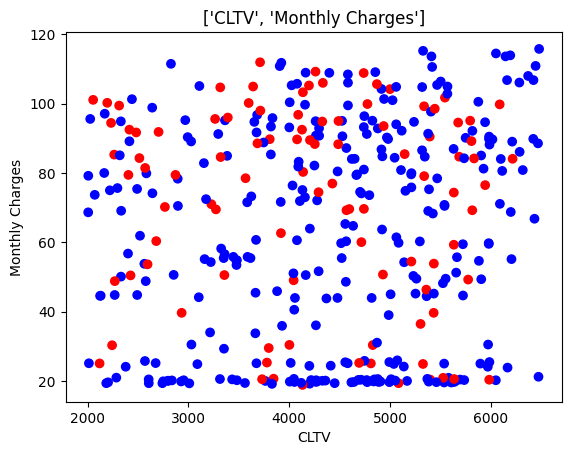

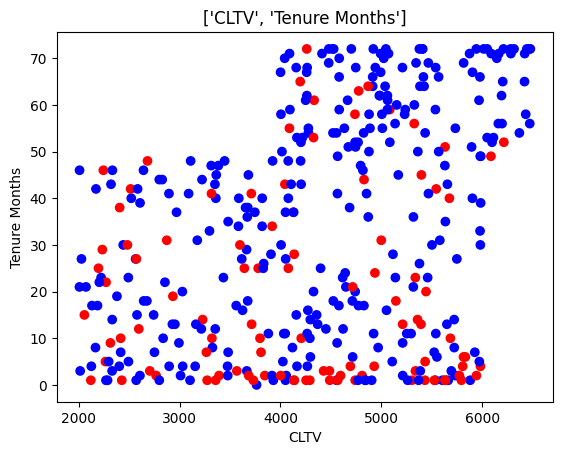

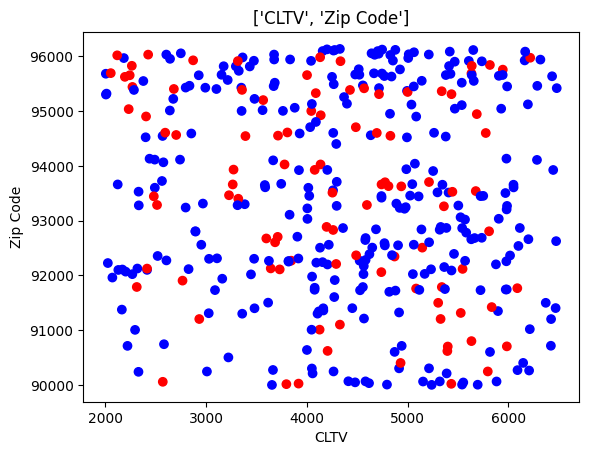

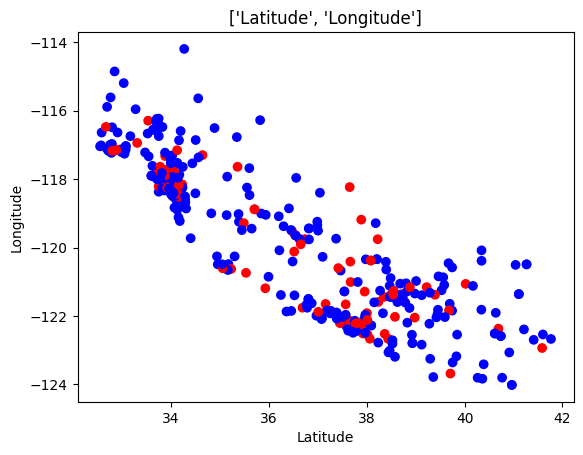

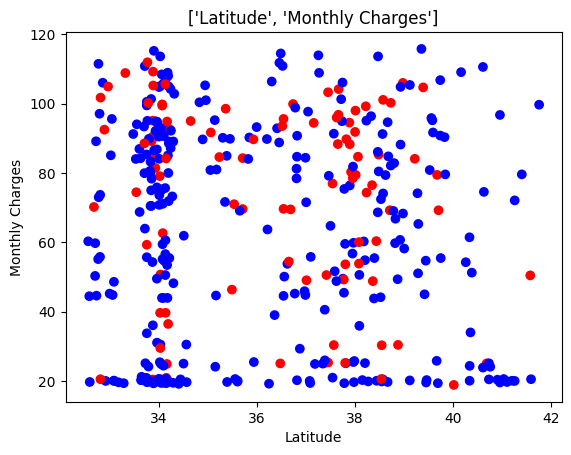

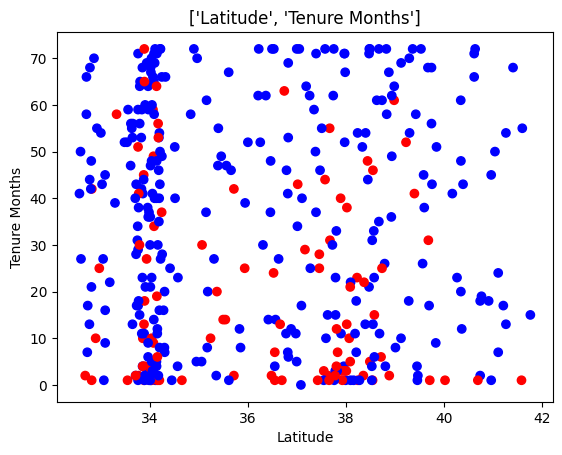

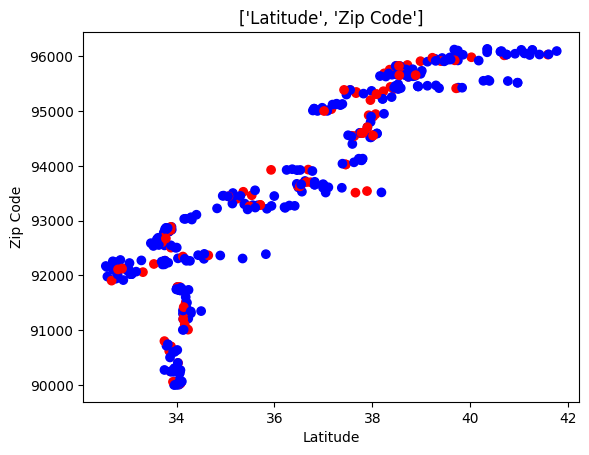

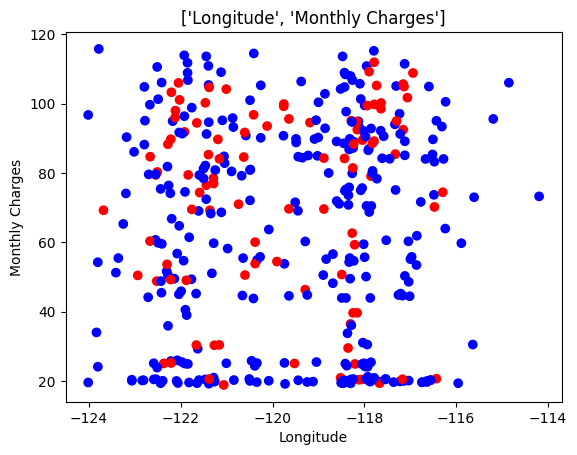

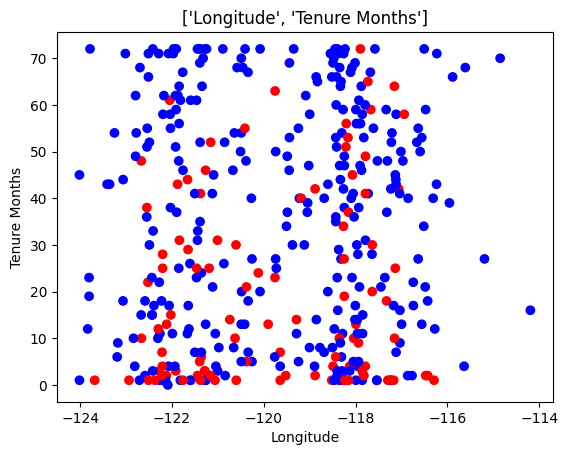

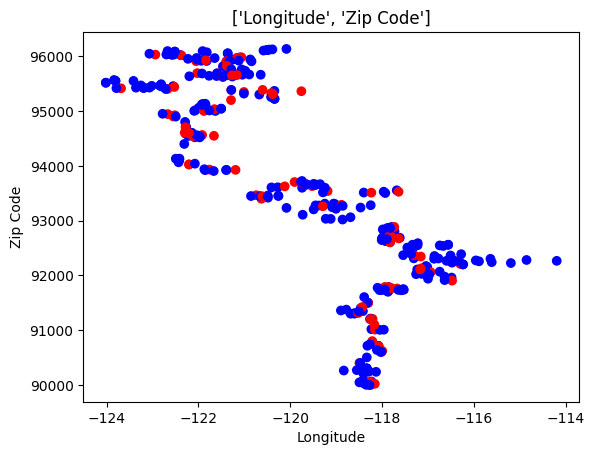

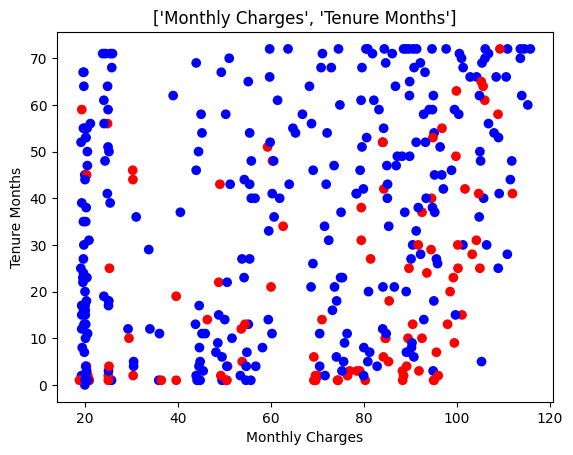

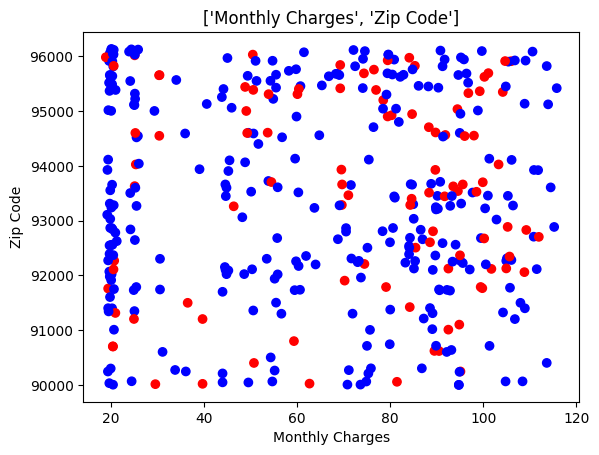

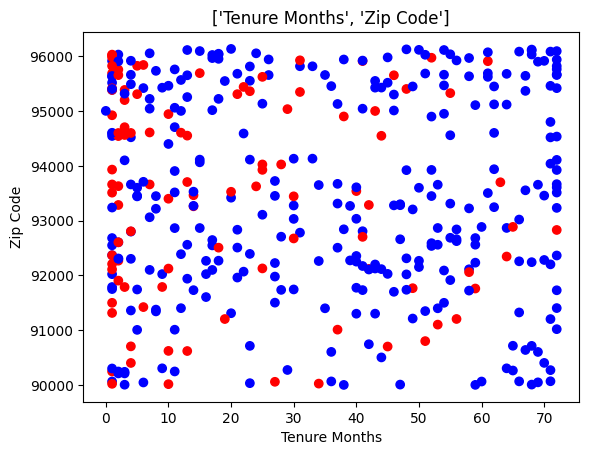

In [ ]:
num_columns_sample = num_columns.sample(400)

colors = {
    1: 'red',
    0: 'blue'
}
colors_list = []

for i in num_columns_sample['Churn Value']:
  colors_list.append(colors[i])
plt.figure(figsize=(10, 8))
for i in range(len(result)):
  plt.scatter(num_columns_sample[result[i][0]], num_columns_sample[result[i][1]], c=colors_list)
  plt.title(f'{result[i]}')
  plt.xlabel(f'{result[i][0]}')
  plt.ylabel(f'{result[i][1]}')
  plt.show()

## Creating models

__Splitting our data into X(our features) and y(our classes); Then, scaling it__

In [ ]:
from sklearn.preprocessing import StandardScaler

X = only_num_data.drop(['Churn Value','Churn Score'], axis=1)
y = only_num_data['Churn Value']
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)
print(X_scaled.shape)
print(y.shape)

(7043, 49)
(7043,)


__Splitting data into train and test__

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=SEED)

__Function "get_acc_scores" to get different metric scores__

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def get_acc_scores(classifier, X_test_m, y_pred):
  print('-'*15, str(classifier), '-'*15)
  accuracy = accuracy_score(y_test, y_pred)
  classification_score = metrics.classification_report(y_test, y_pred)
  roc_auc_acc = metrics.roc_auc_score(y_test, y_pred)
  cross_val_scores = cross_val_score(classifier, X_test_m, y_test, cv=5)

  print('Accuracy: ', accuracy)
  print(classification_score)
  print('ROC AUC score:', roc_auc_acc)
  print('cross_val_score', cross_val_scores.mean())

__Function "get_feature_importance" to see which features were improtant for the model__

In [ ]:
features = X.columns

def get_feature_importance(feature_importance):
  for col, coef in zip(features, feature_importance):
    print(f"{col}: {coef*1000}")

### __Logistic regression__

In [ ]:
logistic_classifier = linear_model.LogisticRegression(random_state=SEED, max_iter=10000)
logistic_classifier.fit(X_train, y_train)
y_pred_logistic = logistic_classifier.predict(X_test)

In [ ]:
get_acc_scores(logistic_classifier, X_test, y_pred_logistic)

--------------- LogisticRegression(max_iter=10000, random_state=42) ---------------
Accuracy:  0.7808063600227144
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1262
           1       0.66      0.46      0.54       499

    accuracy                           0.78      1761
   macro avg       0.74      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761

ROC AUC score: 0.682894314778527
cross_val_score 0.7768461885140356


In [ ]:
feature_importance_logistic = np.abs(logistic_classifier.coef_).mean(axis=0)
get_feature_importance(feature_importance_logistic)

Zip Code: 34.61208052269754
Latitude: 75.22848086730868
Longitude: 4.628658203071807
Tenure Months: 1356.4972831025166
Monthly Charges: 1002.1374771008246
CLTV: 8.824233660334086
Gender_Female: 1.8997360845457116
Gender_Male: 1.8997360845457116
Senior Citizen_No: 37.739824382553266
Senior Citizen_Yes: 37.7398243825535
Partner_No: 17.541742378066473
Partner_Yes: 17.541742378066484
Dependents_No: 139.22371352398514
Dependents_Yes: 139.22371352398488
Phone Service_No: 2.37067970113673
Phone Service_Yes: 2.3706797011368326
Multiple Lines_No: 33.85506968177839
Multiple Lines_No phone service: 2.37067970113673
Multiple Lines_Yes: 35.672193361296976
Internet Service_DSL: 48.823461188675196
Internet Service_Fiber optic: 49.68948790273067
Internet Service_No: 3.5770335978299665
Online Security_No: 18.96421015668946
Online Security_No internet service: 3.5770335978299665
Online Security_Yes: 17.709326915117522
Online Backup_No: 73.72196201212742
Online Backup_No internet service: 3.5770335978299

### __SVC with different kernels__

In [ ]:
from sklearn.svm import SVC, LinearSVC

all_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernels_results = {}
for kernel in all_kernels:
  svc_classifier = SVC(kernel=kernel, probability=True, random_state=SEED)
  svc_classifier.fit(X_train, y_train)
  y_pred_svc = svc_classifier.predict(X_test)
  get_acc_scores(svc_classifier, X_test, y_pred_svc)

--------------- SVC(kernel='linear', probability=True, random_state=42) ---------------
Accuracy:  0.7825099375354913
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1262
           1       0.66      0.47      0.55       499

    accuracy                           0.78      1761
   macro avg       0.74      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761

ROC AUC score: 0.6877177492862111
cross_val_score 0.7722975148081381
--------------- SVC(kernel='poly', probability=True, random_state=42) ---------------
Accuracy:  0.760931289040318
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1262
           1       0.65      0.34      0.44       499

    accuracy                           0.76      1761
   macro avg       0.72      0.63      0.65      1761
weighted avg       0.74      0.76      0.73      1761

ROC AUC score: 0.632678987134332
cross_val_s

__The best result shows linear kernel__

In [ ]:
svc_classifier = SVC(kernel='linear', probability=True, random_state=SEED)
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)

In [ ]:
get_acc_scores(svc_classifier, X_test, y_pred_svc)

--------------- SVC(kernel='linear', probability=True, random_state=42) ---------------
Accuracy:  0.7825099375354913
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1262
           1       0.66      0.47      0.55       499

    accuracy                           0.78      1761
   macro avg       0.74      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761

ROC AUC score: 0.6877177492862111
cross_val_score 0.7722975148081381


In [ ]:
feature_importance_svc = np.abs(svc_classifier.coef_).mean(axis=0)
get_feature_importance(feature_importance_svc)

Zip Code: 66.52422752523846
Latitude: 123.22704107445337
Longitude: 12.425693628429935
Tenure Months: 1044.384230664548
Monthly Charges: 791.4886359037894
CLTV: 36.28843208979615
Gender_Female: 11.772460351844316
Gender_Male: 11.772460351844316
Senior Citizen_No: 44.452259300383545
Senior Citizen_Yes: 44.45225930030183
Partner_No: 9.16157483654423
Partner_Yes: 9.161574836528462
Dependents_No: 100.43736751460398
Dependents_Yes: 100.43736751463595
Phone Service_No: 2.8063976951404612
Phone Service_Yes: 2.80639769512836
Multiple Lines_No: 16.526789589542233
Multiple Lines_No phone service: 2.8063976951404612
Multiple Lines_Yes: 15.040295295353001
Internet Service_DSL: 51.85498081909845
Internet Service_Fiber optic: 52.282837578016995
Internet Service_No: 3.206457318490674
Online Security_No: 5.319800875432379
Online Security_No internet service: 3.206457318490674
Online Security_Yes: 2.9607380514919956
Online Backup_No: 66.51677107447185
Online Backup_No internet service: 3.20645731849067

### __LinearSVC__

In [ ]:
linearsvc_classifier = LinearSVC(dual="auto", random_state=SEED)
linearsvc_classifier.fit(X_train, y_train)
y_pred_linearsvc = linearsvc_classifier.predict(X_test)

In [ ]:
get_acc_scores(linearsvc_classifier, X_test, y_pred_linearsvc)

--------------- LinearSVC(random_state=42) ---------------
Accuracy:  0.7836456558773425
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1262
           1       0.68      0.45      0.54       499

    accuracy                           0.78      1761
   macro avg       0.74      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761

ROC AUC score: 0.6830578748622442
cross_val_score 0.7774143703322174


In [ ]:
feature_importance_linearsvc = np.abs(linearsvc_classifier.coef_).mean(axis=0)
get_feature_importance(feature_importance_linearsvc)

Zip Code: 13.33180171524752
Latitude: 27.806250210330436
Longitude: 0.8827080965999278
Tenure Months: 466.290838521644
Monthly Charges: 352.1784057913437
CLTV: 6.245491859127368
Gender_Female: 0.42757383808960775
Gender_Male: 0.42757383808960775
Senior Citizen_No: 13.456671824203196
Senior Citizen_Yes: 13.456671824202756
Partner_No: 6.038317363210448
Partner_Yes: 6.038317363210525
Dependents_No: 51.69629186822117
Dependents_Yes: 51.69629186822084
Phone Service_No: 1.2095041764976824
Phone Service_Yes: 1.209504176497758
Multiple Lines_No: 12.299288843133496
Multiple Lines_No phone service: 1.2095041764976824
Multiple Lines_Yes: 13.167979294664091
Internet Service_DSL: 16.93362178336308
Internet Service_Fiber optic: 17.167688605768085
Internet Service_No: 1.1607588281017016
Online Security_No: 7.2235934389476455
Online Security_No internet service: 1.1607588281017016
Online Security_Yes: 6.929408078900154
Online Backup_No: 26.135059792866212
Online Backup_No internet service: 1.160758828

### __SGD__

In [ ]:
sgd_classifier = linear_model.SGDClassifier()
sgd_classifier.fit(X_train, y_train)
y_pred_sgd = sgd_classifier.predict(X_test)

In [ ]:
get_acc_scores(sgd_classifier, X_test, y_pred_sgd)

--------------- SGDClassifier() ---------------
Accuracy:  0.7223168654173765
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1262
           1       0.51      0.42      0.46       499

    accuracy                           0.72      1761
   macro avg       0.65      0.63      0.64      1761
weighted avg       0.71      0.72      0.71      1761

ROC AUC score: 0.6305757314946852
cross_val_score 0.7058427762039661


In [ ]:
feature_importance_sgd = np.abs(sgd_classifier.coef_).mean(axis=0)
get_feature_importance(feature_importance_sgd)

Zip Code: 284.45477620220134
Latitude: 230.13242215832207
Longitude: 273.1716805225984
Tenure Months: 1628.9062976421926
Monthly Charges: 1293.2628412530955
CLTV: 47.136754083038106
Gender_Female: 168.76705123411787
Gender_Male: 168.76705123411787
Senior Citizen_No: 99.93736016551476
Senior Citizen_Yes: 99.93736016551719
Partner_No: 80.14977238150766
Partner_Yes: 80.14977238150792
Dependents_No: 284.1513491928659
Dependents_Yes: 284.1513491928701
Phone Service_No: 108.43852773225474
Phone Service_Yes: 108.43852773225404
Multiple Lines_No: 164.71778426967566
Multiple Lines_No phone service: 108.43852773225474
Multiple Lines_Yes: 101.71611948699648
Internet Service_DSL: 59.201774431338315
Internet Service_Fiber optic: 61.545078955279656
Internet Service_No: 5.895395352074672
Online Security_No: 111.35416868070364
Online Security_No internet service: 5.895395352074672
Online Security_Yes: 117.74990756961445
Online Backup_No: 105.71479247264335
Online Backup_No internet service: 5.89539535

### __RandomForest with different number of estimators__

In [ ]:
from sklearn.ensemble import RandomForestClassifier

estimators = [50, 75, 100, 125]
for estimator in estimators:
  randomforest_classifier = RandomForestClassifier(random_state=SEED, n_estimators=estimator, criterion="gini")
  randomforest_classifier.fit(X_train, y_train)
  y_pred_randomforest_clf = randomforest_classifier.predict(X_test)
  get_acc_scores(randomforest_classifier, X_test, y_pred_randomforest_clf)

--------------- RandomForestClassifier(n_estimators=50, random_state=42) ---------------
Accuracy:  0.7717206132879046
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1262
           1       0.68      0.37      0.48       499

    accuracy                           0.77      1761
   macro avg       0.73      0.65      0.67      1761
weighted avg       0.76      0.77      0.75      1761

ROC AUC score: 0.6498996408030006
cross_val_score 0.7779777234097347
--------------- RandomForestClassifier(n_estimators=75, random_state=42) ---------------
Accuracy:  0.7762634866553095
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1262
           1       0.69      0.39      0.49       499

    accuracy                           0.78      1761
   macro avg       0.74      0.66      0.68      1761
weighted avg       0.76      0.78      0.75      1761

ROC AUC score: 0.6585214803616742
cross

__RandomForest with 100 estimators shows the best result__

In [ ]:
randomforest_classifier = RandomForestClassifier(random_state=SEED, n_estimators=100, criterion="gini")
randomforest_classifier.fit(X_train, y_train)
y_pred_randomforest_clf = randomforest_classifier.predict(X_test)

In [ ]:
get_acc_scores(randomforest_classifier, X_test, y_pred_randomforest_clf)

--------------- RandomForestClassifier(random_state=42) ---------------
Accuracy:  0.7756956274843839
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1262
           1       0.68      0.39      0.50       499

    accuracy                           0.78      1761
   macro avg       0.74      0.66      0.68      1761
weighted avg       0.76      0.78      0.75      1761

ROC AUC score: 0.6587310913427489
cross_val_score 0.7796854880247232


In [ ]:
get_feature_importance(randomforest_classifier.feature_importances_)

Zip Code: 78.93370813224107
Latitude: 80.27355155022622
Longitude: 79.87846683133974
Tenure Months: 178.03237505402439
Monthly Charges: 140.42333479837743
CLTV: 89.28942344656593
Gender_Female: 11.907835256179721
Gender_Male: 12.401912953708965
Senior Citizen_No: 7.397738070443465
Senior Citizen_Yes: 7.706613099171983
Partner_No: 10.561365527679191
Partner_Yes: 10.187119994911145
Dependents_No: 13.54974719708665
Dependents_Yes: 12.180966196665867
Phone Service_No: 3.9092074537080594
Phone Service_Yes: 4.081396191836722
Multiple Lines_No: 10.830899517877661
Multiple Lines_No phone service: 3.6867649377845515
Multiple Lines_Yes: 10.137554595555661
Internet Service_DSL: 9.15452258418242
Internet Service_Fiber optic: 8.707216674700879
Internet Service_No: 1.5230306200022068
Online Security_No: 9.785912243574355
Online Security_No internet service: 1.8262877296780935
Online Security_Yes: 7.541295581115611
Online Backup_No: 10.502760880958139
Online Backup_No internet service: 1.431188948610

__Logistic regression perfomed better with raw params add all features__

## Plotting results

In [ ]:
X_test_sample = pd.DataFrame(X_test).sample(1000)
y_test_sample = np.take(y_test, X_test_sample.index, axis=0)

colors = {
      1: 'red',
      0: 'blue'
  }
colors_list_true = []
[colors_list_true.append(colors[i]) for i in y_test_sample]

def get_plot_result(model: str, y_pred):

  y_pred_sample = np.take(y_pred, X_test_sample.index, axis=0)
  colors_list_pred = []
  [colors_list_pred.append(colors[i]) for i in y_pred_sample]

  fig, ax = plt.subplots(2, 1, figsize=(12, 10))

  ax[0].scatter(X_test_sample[4], X_test_sample[3], c=colors_list_true)
  ax[0].set_title('True')

  ax[1].scatter(X_test_sample[4], X_test_sample[3], c=colors_list_pred)
  ax[1].set_title(f'{model} Pred')
  plt.show()


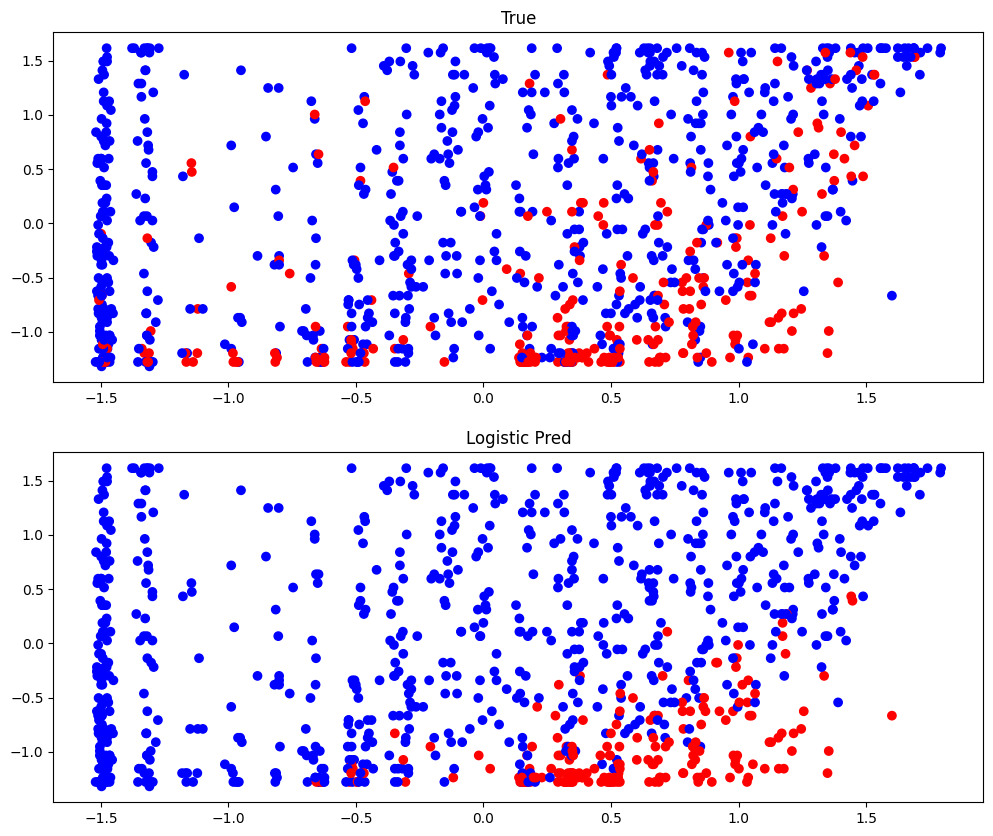

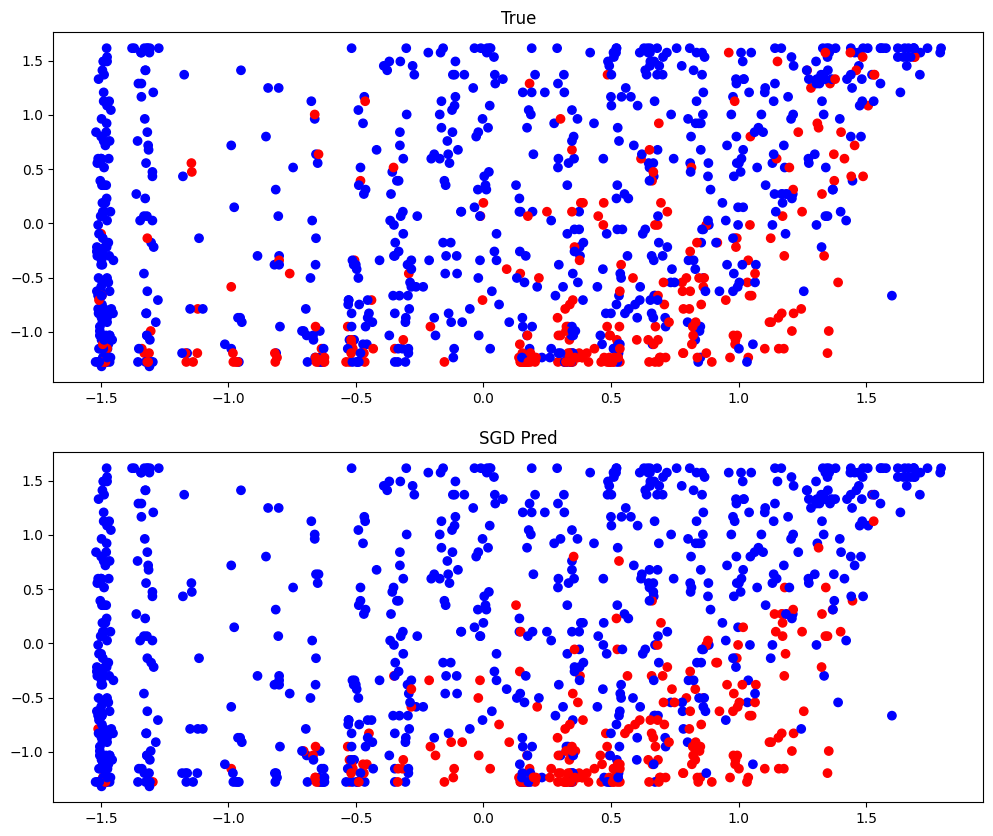

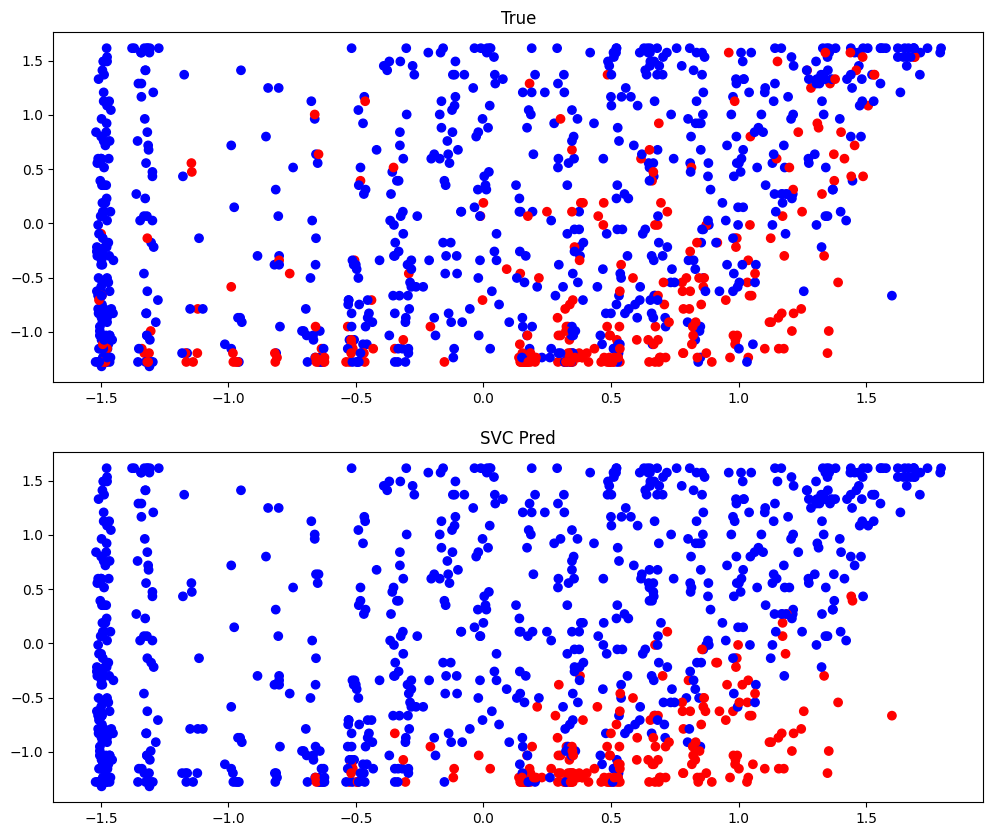

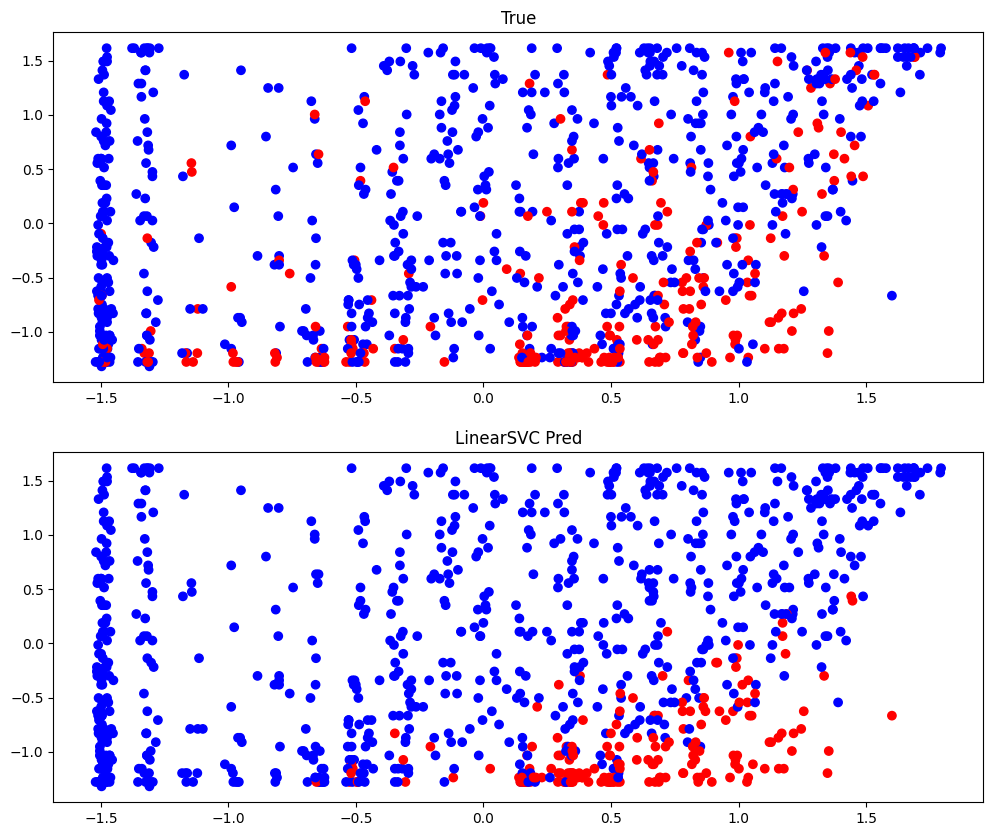

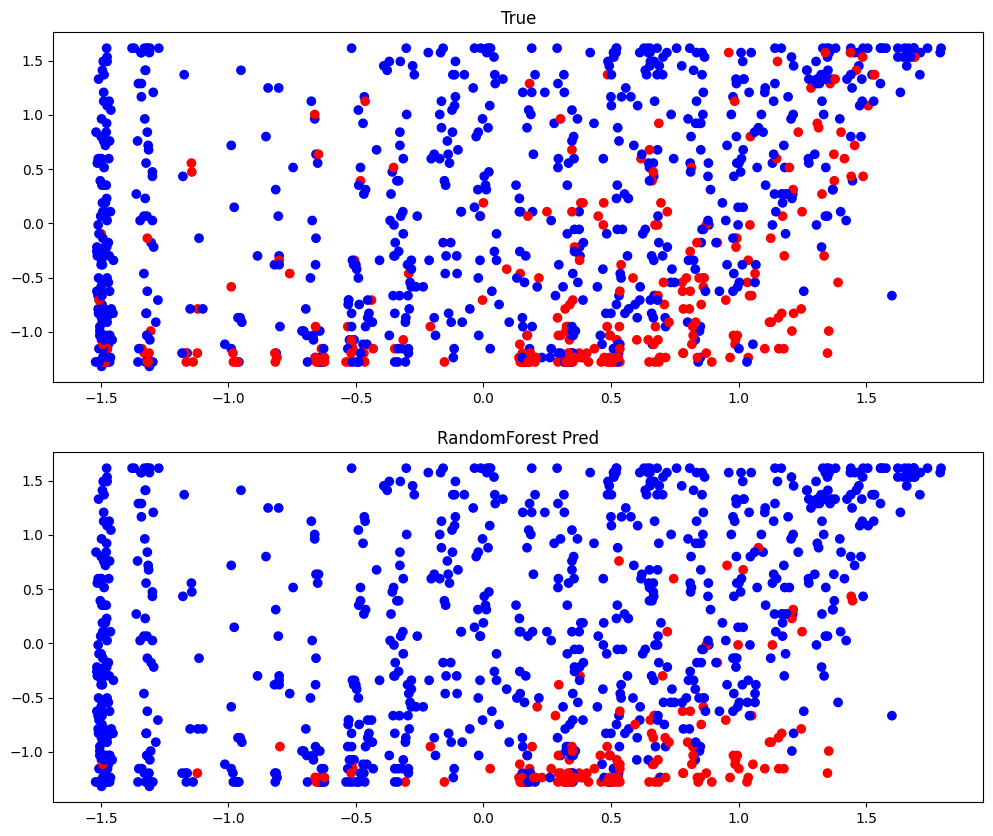

In [ ]:
get_plot_result('Logistic', y_pred_logistic)
get_plot_result('SGD', y_pred_sgd)
get_plot_result('SVC', y_pred_svc)
get_plot_result('LinearSVC', y_pred_linearsvc)
get_plot_result('RandomForest', y_pred_randomforest_clf)

__By analyzing the accuracy scores and visualizing the results, I chose the SGD classifier.__


## Models with features with more than 100 importance

In [ ]:
def get_best_features(best_features):
  X_train_b_f, X_test_b_f = np.take(X_train, best_features, axis=1), np.take(X_test, best_features, axis=1)
  X_train_b_f = X_train_b_f.reshape(X_train.shape[0], best_features.shape[1])
  X_test_b_f = X_test_b_f.reshape(X_test.shape[0], best_features.shape[1])
  return (X_train_b_f, X_test_b_f)

#### Logistic regression with best features

In [ ]:
best_features_logistic = np.array(np.where(feature_importance_logistic*1000 > 100))
best_features_logistic

array([[ 3,  4, 12, 13, 40]])

In [ ]:
X_train_logistic, X_test_logistic = get_best_features(best_features_logistic)
X_train_logistic.shape, X_test_logistic.shape

((5282, 5), (1761, 5))

In [ ]:
logistic_classifier = linear_model.LogisticRegression()
logistic_classifier.fit(X_train_logistic, y_train)
y_pred_logistic = logistic_classifier.predict(X_test_logistic)

In [ ]:
get_acc_scores(logistic_classifier, X_test_logistic, y_pred_logistic)

--------------- LogisticRegression() ---------------
Accuracy:  0.7825099375354913
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1262
           1       0.67      0.46      0.55       499

    accuracy                           0.78      1761
   macro avg       0.74      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761

ROC AUC score: 0.6852945193080298
cross_val_score 0.7859322688642802


#### SGD with best features

In [ ]:
best_features_sgd = np.array(np.where(feature_importance_sgd*1000 > 100))
best_features_sgd

array([[ 0,  1,  2,  3,  4,  6,  7, 12, 13, 14, 15, 16, 17, 18, 22, 24,
        25, 27, 31, 33, 34, 36, 40, 42, 43, 44, 45, 48]])

In [ ]:
X_train_sgd, X_test_sgd = get_best_features(best_features_sgd)
X_train_sgd.shape, X_test_sgd.shape

((5282, 28), (1761, 28))

In [ ]:
sgd_classifier = linear_model.SGDClassifier()
sgd_classifier.fit(X_train_sgd, y_train)
y_pred_sgd = sgd_classifier.predict(X_test_sgd)

In [ ]:
get_acc_scores(sgd_classifier, X_test_sgd, y_pred_sgd)

--------------- SGDClassifier() ---------------
Accuracy:  0.7649063032367973
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1262
           1       0.63      0.42      0.51       499

    accuracy                           0.76      1761
   macro avg       0.71      0.66      0.68      1761
weighted avg       0.75      0.76      0.75      1761

ROC AUC score: 0.6621078924886222
cross_val_score 0.7177745943857842


#### LinearSVC with best features

In [ ]:
best_features_linearsvc = np.array(np.where(feature_importance_linearsvc*1000 > 100))
best_features_linearsvc

array([[3, 4]])

In [ ]:
X_train_linearsvc, X_test_linearsvc = get_best_features(best_features_linearsvc)
X_train_linearsvc.shape, X_test_linearsvc.shape

((5282, 2), (1761, 2))

In [ ]:
linearsvc_classifier = LinearSVC(dual="auto", random_state=SEED)
linearsvc_classifier.fit(X_train_linearsvc, y_train)
y_pred_linearsvc = linearsvc_classifier.predict(X_test_linearsvc)

In [ ]:
get_acc_scores(linearsvc_classifier, X_test_linearsvc, y_pred_linearsvc)

--------------- LinearSVC(random_state=42) ---------------
Accuracy:  0.78137421919364
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1262
           1       0.67      0.45      0.54       499

    accuracy                           0.78      1761
   macro avg       0.74      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761

ROC AUC score: 0.6826847037974523
cross_val_score 0.7779745042492918


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'loss': ['hinge', 'squared_hinge'],
#     'C': [0.2, 0.4, 0.8, 1],
#     'tol': [1e-3, 1e-5, 1e-7]
# }
# linearsvc_classifier = LinearSVC(max_iter=20000, penalty='l2')
# grid_search = GridSearchCV(linearsvc_classifier, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print('best score:', grid_search.best_score_)
# print('best params:', grid_search.best_params_)

In [ ]:

# param_grid_rndForest = {
#     'n_estimators': [75, 100, 125],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': [3, 5, 6, 8]
# }
# rndForest_classifier = RandomForestClassifier()
# grid_search = GridSearchCV(rndForest_classifier, param_grid=param_grid_rndForest, cv=5)
# grid_search.fit(X_train, y_train)
# print('best score:', grid_search.best_score_)
# print('best params:', grid_search.best_params_)

### RandomForest with best features

In [ ]:
best_features_rnd_forest = np.array(np.where(randomforest_classifier.feature_importances_*1000 > 100))
best_features_rnd_forest

array([[3, 4]])

In [ ]:
X_train_rnd_forest, X_test_rnd_forest = get_best_features(best_features_rnd_forest)
X_train_rnd_forest.shape, X_test_rnd_forest.shape

((5282, 2), (1761, 2))

In [ ]:
rnd_forest_classifier = RandomForestClassifier()
rnd_forest_classifier.fit(X_train_rnd_forest, y_train)
y_pred_rnd_forest = rnd_forest_classifier.predict(X_test_rnd_forest)

In [ ]:
get_acc_scores(rnd_forest_classifier, X_test_rnd_forest, y_pred_rnd_forest)

--------------- RandomForestClassifier() ---------------
Accuracy:  0.7450312322544009
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1262
           1       0.56      0.49      0.52       499

    accuracy                           0.75      1761
   macro avg       0.68      0.67      0.67      1761
weighted avg       0.74      0.75      0.74      1761

ROC AUC score: 0.6670210468480543
cross_val_score 0.7478737445274273


## Models with best features & polynom

### Logistic Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def get_pred_poly(model, X_train_model, X_test_model):
  poly = PolynomialFeatures(degree=2)
  X_train_poly = poly.fit_transform(X_train_model)
  X_test_poly = poly.transform(X_test_model)

  model.fit(X_train_poly, y_train)
  y_pred_poly = model.predict(X_test_poly)
  return (X_test_poly, y_pred_poly)

In [ ]:
logistic_classifier_poly = linear_model.LogisticRegression()
X_test_linear_poly, y_pred_linear_poly = get_pred_poly(logistic_classifier_poly, X_train_logistic, X_test_logistic)

In [ ]:
get_acc_scores(logistic_classifier_poly, X_test_linear_poly, y_pred_linear_poly)

--------------- LogisticRegression() ---------------
Accuracy:  0.7881885292447472
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1262
           1       0.68      0.48      0.56       499

    accuracy                           0.79      1761
   macro avg       0.75      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761

ROC AUC score: 0.6965261743772807
cross_val_score 0.7825247875354108


### SGD

In [ ]:
sgd_classifier_poly = linear_model.SGDClassifier()
X_test_sgd_poly, y_pred_sgd_poly = get_pred_poly(sgd_classifier_poly, X_train_sgd, X_test_sgd)

In [ ]:
get_acc_scores(sgd_classifier_poly, X_test_sgd_poly, y_pred_sgd_poly)

--------------- SGDClassifier() ---------------
Accuracy:  0.7410562180579217
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1262
           1       0.59      0.27      0.38       499

    accuracy                           0.74      1761
   macro avg       0.68      0.60      0.61      1761
weighted avg       0.72      0.74      0.71      1761

ROC AUC score: 0.6000320768319523
cross_val_score 0.7092840587174865


### Linear SVC

In [ ]:
linearsvc_classifier_poly = LinearSVC(dual="auto", random_state=SEED)
X_test_svc_poly, y_pred_svc_poly = get_pred_poly(linearsvc_classifier_poly, X_train_linearsvc, X_test_linearsvc)

In [ ]:
get_acc_scores(linearsvc_classifier_poly, X_test_svc_poly, y_pred_svc_poly)

--------------- LinearSVC(random_state=42) ---------------
Accuracy:  0.7819420783645656
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1262
           1       0.68      0.44      0.53       499

    accuracy                           0.78      1761
   macro avg       0.74      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761

ROC AUC score: 0.67823444035456
cross_val_score 0.7779745042492918


### RandomForest

In [ ]:
rnd_forest_classifier_poly = RandomForestClassifier()
X_test_rnd_forest_poly, y_pred_rnd_forest_poly = get_pred_poly(rnd_forest_classifier_poly, X_train_rnd_forest, X_test_rnd_forest)

In [ ]:
get_acc_scores(rnd_forest_classifier_poly, X_test_rnd_forest_poly, y_pred_rnd_forest_poly)

--------------- RandomForestClassifier() ---------------
Accuracy:  0.750709823963657
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1262
           1       0.57      0.48      0.52       499

    accuracy                           0.75      1761
   macro avg       0.69      0.67      0.68      1761
weighted avg       0.74      0.75      0.74      1761

ROC AUC score: 0.6703772044882158
cross_val_score 0.7478753541076488


## Logistic Regression GridSearch

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('poly', PolynomialFeatures(3, include_bias=True)), # Polynomial Features
                 ('scaler', StandardScaler())])

In [ ]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train_poly, X_test_poly = np.array(X_train_poly), np.array(X_test_poly)

In [ ]:
# best_features_logistic = best_features_logistic.flatten()
best_features_logistic

array([[ 3,  4, 12, 13, 40]])

In [ ]:
X_train_poly.shape

(5282, 49)

In [ ]:
X_train_poly, X_test_poly = np.take(X_train_poly, best_features_logistic, axis=1), np.take(X_test_poly, best_features_logistic, axis=1)
X_train_poly = X_train_poly.reshape(X_train_poly.shape[0], best_features_logistic.shape[1])
X_test_poly = X_test_poly.reshape(X_test_poly.shape[0], best_features_logistic.shape[1])

In [ ]:
X_train_poly.shape

(5282, 5)

In [ ]:
X_train_poly_scale = pipe.fit_transform(X_train_poly)
X_train_poly_scale.shape

(5282, 56)

In [ ]:
X_test_poly_scale = pipe.fit_transform(X_test_poly)
X_test_poly_scale.shape

(1761, 56)

In [ ]:
logistic_classifier_poly = linear_model.LogisticRegression()
logistic_classifier_poly.fit(X_train_poly_scale, y_train)
y_pred_poly_scale = logistic_classifier_poly.predict(X_test_poly_scale)

In [ ]:
get_acc_scores(logistic_classifier_poly, X_test_poly_scale, y_pred_poly_scale)

--------------- LogisticRegression() ---------------
Accuracy:  0.7893242475865985
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1293
           1       0.64      0.47      0.54       468

    accuracy                           0.79      1761
   macro avg       0.73      0.69      0.70      1761
weighted avg       0.78      0.79      0.78      1761

ROC AUC score: 0.6874789299383267
cross_val_score 0.7915947720834406


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 100, 150, 200],
    'solver': ['lbfgs','liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
  }
grid_cv = GridSearchCV(logistic_classifier_poly, param_grid).fit(X_train_poly_scale, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_estimator_)

0.7970503282589375
LogisticRegression(C=100, solver='sag')


In [ ]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
rest_clf = OneVsRestClassifier(linear_model.LogisticRegression(C=100, solver='liblinear')).fit(X_train_poly_scale, y_train)
y_pred_rest_clf = rest_clf.predict(X_test_poly_scale)
one_clf = OneVsOneClassifier(linear_model.LogisticRegression(C=100, solver='liblinear')).fit(X_train_poly_scale, y_train)
y_pred_one_clf = one_clf.predict(X_test_poly_scale)

In [ ]:
get_acc_scores(rest_clf, X_test_m=X_test_poly_scale, y_pred=y_pred_rest_clf)

--------------- OneVsRestClassifier(estimator=LogisticRegression(C=100, solver='liblinear')) ---------------
Accuracy:  0.7915956842703009
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1293
           1       0.66      0.45      0.53       468

    accuracy                           0.79      1761
   macro avg       0.74      0.68      0.70      1761
weighted avg       0.78      0.79      0.78      1761

ROC AUC score: 0.6828906141551153
cross_val_score 0.7921677826422868


In [ ]:
get_acc_scores(one_clf, X_test_m=X_test_poly_scale, y_pred=y_pred_one_clf)

--------------- OneVsOneClassifier(estimator=LogisticRegression(C=100, solver='liblinear')) ---------------
Accuracy:  0.7915956842703009
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1293
           1       0.66      0.45      0.53       468

    accuracy                           0.79      1761
   macro avg       0.74      0.68      0.70      1761
weighted avg       0.78      0.79      0.78      1761

ROC AUC score: 0.6828906141551153
cross_val_score 0.7921677826422868


In [ ]:
X_test_poly_scale_df = pd.DataFrame(X_test_poly_scale)
X_test_poly_scale_df.shape

(1761, 56)

In [ ]:
X_test_one_vs_rest_sample = X_test_poly_scale_df.sample(400)
y_pred_one_vs_rest_sample = np.take(y_pred_rest_clf, X_test_one_vs_rest_sample.index, axis=0)
y_test_sample_true = np.take(y_test, X_test_one_vs_rest_sample.index, axis=0)
display(X_test_one_vs_rest_sample.shape)
display(y_pred_one_vs_rest_sample.shape)
display(y_test_sample_true.shape)

(400, 56)

(400,)

(400,)

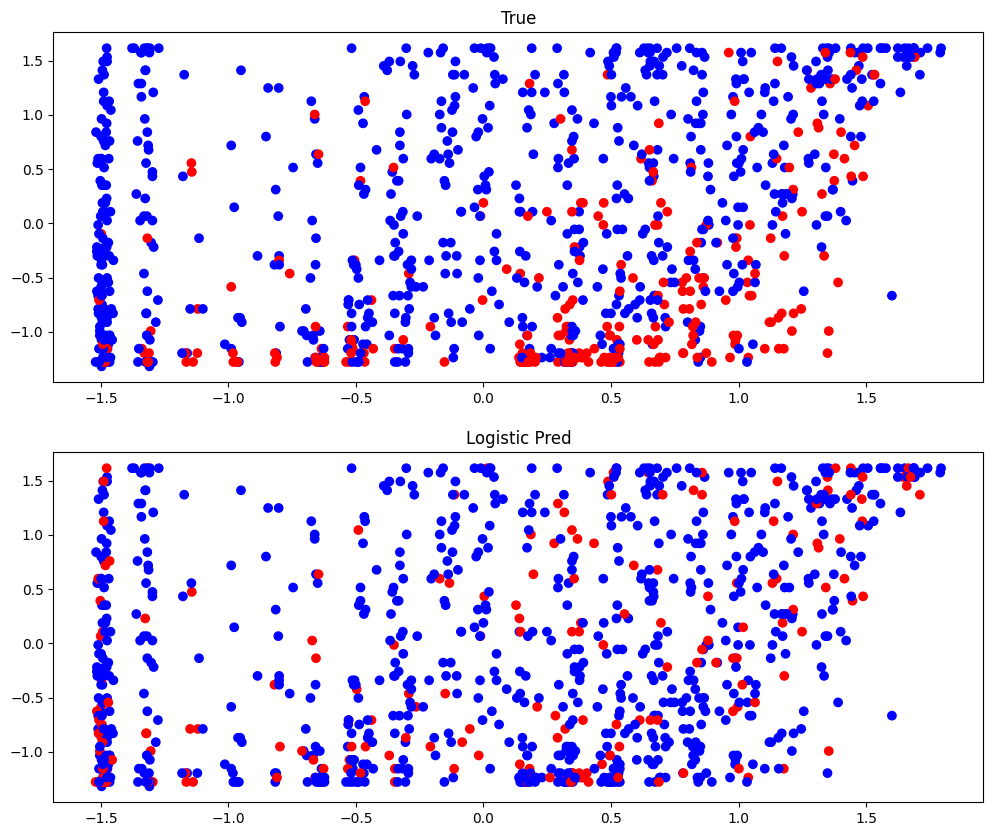

In [ ]:
get_plot_result('Logistic', y_pred_rest_clf)

## Practise

In [ ]:
def get_pred_poly_3(model, X_train_model, X_test_model):
  poly = PolynomialFeatures(degree=3)
  X_train_poly = poly.fit_transform(X_train_model)
  X_test_poly = poly.transform(X_test_model)

  model.fit(X_train_poly, y_train)
  y_pred_poly = model.predict(X_test_poly)
  return (X_test_poly, y_pred_poly)

In [ ]:

X_test_linear_poly, y_pred_linear_poly = get_pred_poly_3(logistic_classifier_poly, X_train_logistic, X_test_logistic)

In [ ]:
get_acc_scores(logistic_classifier_poly, X_test_linear_poly, y_pred_linear_poly)

--------------- LogisticRegression() ---------------
Accuracy:  0.7342419080068143
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1293
           1       0.00      0.00      0.00       468

    accuracy                           0.73      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.73      0.62      1761

ROC AUC score: 0.5
cross_val_score 0.7336740278135462


In [ ]:
X_train_des_tree, X_test_des_tree, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train_des_tree, X_test_des_tree = np.array(X_train_des_tree), np.array(X_test_des_tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

des_tree_clf = DecisionTreeClassifier()
des_tree_clf.fit(X_train_des_tree, y_train)
y_pred_des_tree = des_tree_clf.predict(X_test_des_tree)

In [ ]:
get_acc_scores(des_tree_clf, X_test_des_tree, y_pred_des_tree)

--------------- DecisionTreeClassifier() ---------------
Accuracy:  0.7115275411697899
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1309
           1       0.44      0.48      0.46       452

    accuracy                           0.71      1761
   macro avg       0.63      0.64      0.63      1761
weighted avg       0.72      0.71      0.72      1761

ROC AUC score: 0.6372146203614188
cross_val_score 0.709834535153232


In [ ]:
param_grid = {
    'max_depth': [2, 4, 5, 10, 20, 40],
    'min_samples_leaf': [8, 16, 32, 50, 100, 150]
  }
grid_cv = GridSearchCV(DecisionTreeClassifier(), param_grid).fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_estimator_)

0.7317305624838737
DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('https://codefinity-content-media.s3.eu-west-1.amazonaws.com/b71ff7ac-3932-41d2-a4d8-060e24b00129/breastcancer.csv')
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)
# Scale the `X` since it is needed for most models
X = StandardScaler().fit_transform(X)

model_grids = [] # We will keep trained models here to print the result easier
# k-NN
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn,
                        {'n_neighbors': [3, 5, 7, 12]},
                        scoring='recall').fit(X, y)
model_grids.append(knn_grid)
# Logistic Regression
lr = LogisticRegression()
lr_grid = GridSearchCV(lr,
                       {'C': [0.1, 1, 10]},
                       scoring='recall').fit(X, y)
model_grids.append(lr_grid)
# Decision Tree
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,
                       {'max_depth': [2, 4, 6, 10], 'min_samples_leaf': [1, 2, 4, 7]},
                       scoring='recall').fit(X, y)
model_grids.append(dt_grid)
# Random Forest
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf,
                       {'max_depth': [2, 4, 6], 'n_estimators': [20, 50, 100]},
                       scoring='recall').fit(X, y)
model_grids.append(rf_grid)

for model in model_grids:
  print(model.best_estimator_, '– recall:', model.best_score_)

KNeighborsClassifier(n_neighbors=7) – recall: 0.9387596899224805
LogisticRegression(C=1) – recall: 0.9622369878183832
DecisionTreeClassifier(max_depth=6) – recall: 0.915171650055371
RandomForestClassifier(max_depth=6, n_estimators=20) – recall: 0.9392026578073089
